<a href="https://colab.research.google.com/github//pylabel-project/samples/blob/main/yolo2coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

# Convert Yolo V5 Annotations (TXT Files) to COCO JSON Format
Converting from yolo to another format is a little tricky because yolo format does not store the dimensions of the image, which you will need to convert to most other formats. So you need to read the image file to get the height and width of the image. The PyLabel package takes care of that. This notebook will show how you can import yolo v5 annotations and export them into another format, like COCO.



In [ ]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [ ]:
from pylabel import importer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Yolo annotations 
First we will import annotations stored in Yolo v5 format. (This is a sample data data set. You can edit this part to point to your dataset.)


In [ ]:
%%capture
import os, zipfile

#Download sample yolo dataset 
os.makedirs("data", exist_ok=True)
!wget "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -O data/coco128.zip
with zipfile.ZipFile("data/coco128.zip", 'r') as zip_ref:
   zip_ref.extractall("data")

There are two methods of importing YOLOv5 annotations. The method shown here 'ImportYoloV5' will read the annotations but you must also provide a list of the class names that map to the class ids. There is another method, 'ImportYoloV5WithYaml' that can read the class names from a YAML file, shown in this notebook: [yolo_with_yaml_importer.ipynb](https://github.com/pylabel-project/samples/blob/main/yolo_with_yaml_importer.ipynb)

In [ ]:
path_to_annotations = "/content/drive/MyDrive/aibuilder/embrio1/test/labels"

#Identify the path to get from the annotations to the images 
path_to_images = "/content/drive/MyDrive/aibuilder/embrio1/test/images"

#Import the dataset into the pylable schema 
#Class names are defined here https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml
yoloclasses = ['Atypical lymphocyte', 'Band Neutrophil', 'Basophil', 'Blast', 'Eosinophil', 'Lymphocyte', 'Metamyelocyte', 'Monocyte', 'Myelocyte', 'NRC', 'Promyelocyte', 'Segmented neutrophil']
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpg", name="coco128")

dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/drive/MyDrive/aibuilder/embrio1/test/...,4_00051_jpg.rf.d747453330c034ae2df4697ac9686c7...,,0,732,574,3,,336.0,190.0,...,,,,,,6,Metamyelocyte,,,1
1,/content/drive/MyDrive/aibuilder/embrio1/test/...,6_00147_jpg.rf.ea1eca392bfa69256022516902b7508...,,1,732,574,3,,256.0,220.0,...,,,,,,11,Segmented neutrophil,,,1
2,/content/drive/MyDrive/aibuilder/embrio1/test/...,6_00125_jpg.rf.e44abacdd72b4cdf4a3d217256f8009...,,2,732,574,3,,362.0,65.0,...,,,,,,11,Segmented neutrophil,,,1
3,/content/drive/MyDrive/aibuilder/embrio1/test/...,10_00158_jpg.rf.0bc0512b0daa47aae2b9e666552c40...,,3,732,574,3,,257.0,229.0,...,,,,,,2,Basophil,,,1
4,/content/drive/MyDrive/aibuilder/embrio1/test/...,9_00015_jpg.rf.1c1dc312a7dee4496c9193cc1d2057a...,,4,732,574,3,,301.0,172.0,...,,,,,,4,Eosinophil,,,1


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [ ]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 338
Number of classes: 12
Classes:['Atypical lymphocyte', 'Band Neutrophil', 'Basophil', 'Blast', 'Eosinophil', 'Lymphocyte', 'Metamyelocyte', 'Monocyte', 'Myelocyte', 'NRC', 'Promyelocyte', 'Segmented neutrophil']
Class counts:
Blast                   64
Segmented neutrophil    38
Eosinophil              36
Basophil                35
Monocyte                33
Metamyelocyte           31
Lymphocyte              30
Band Neutrophil         29
Atypical lymphocyte     28
NRC                     28
Myelocyte               23
Promyelocyte            10
                         3
Name: cat_name, dtype: int64


## Edit Annotations 
All of the annotations are stored in a Pandas dataframe that you can access directly as 'dataset.df'. Not only can you do your own custom queries of the dataset, but you can also manipulate the dataset by removing rows, changing labels, etc.  

PyLabel also includes a lightweight annotation tool that you can use to create and edit bounding box annotations within a Jupyter notebook. You can see an example of that tool here: [pylabeler.ipynb](https://github.com/pylabel-project/samples/blob/main/pylabeler.ipynb)

## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

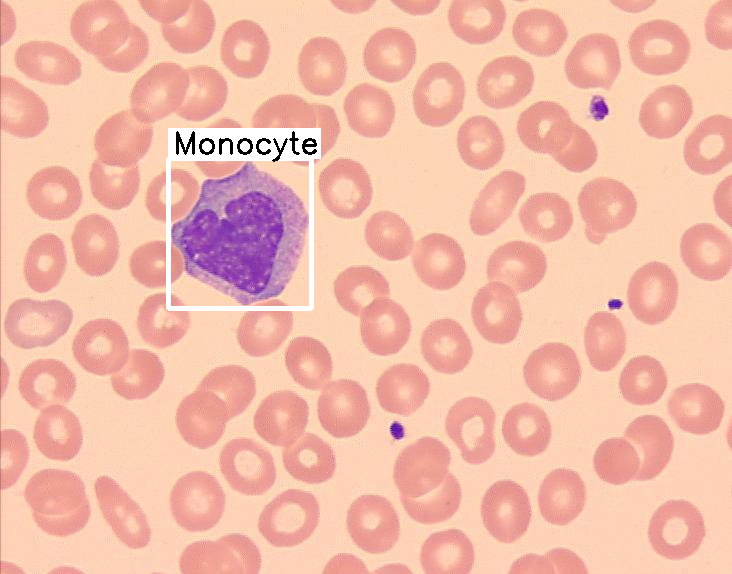

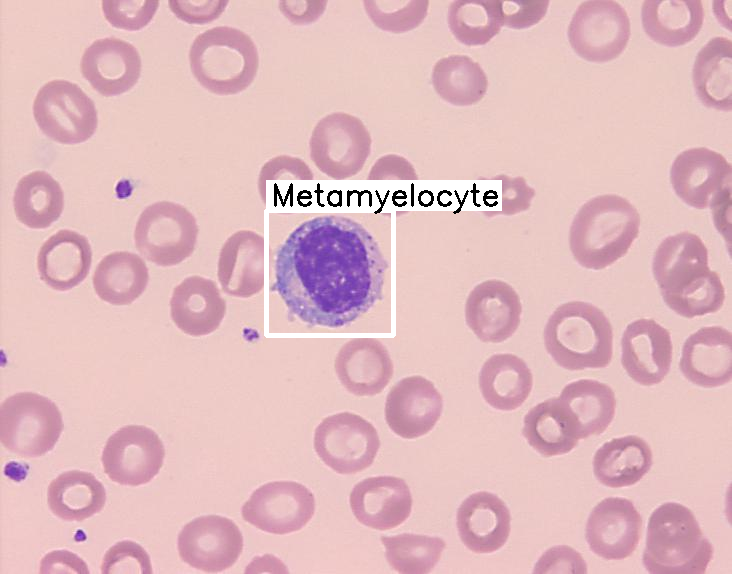

In [ ]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes(30))


# Export to Coco Json
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
All annotations will be stored in a single json file. 

In [ ]:
dataset.export.ExportToCoco(cat_id_index=1)

['/content/drive/MyDrive/aibuilder/embrio1/test/labels/coco128.json']

Thank you for trying PyLabel. If you had any issues running this notebook or have ideas for how to make it better, please submit an issue here https://github.com/pylabel-project/pylabel/issues. 